Queremos ver la cantidad de leyes que se trataron por período. Para eso tenemos un dataset *asuntos-diputados.csv* que tiene una columna "año". De esas votaciones vamos a eliminar las que correspondan a un resultado vacío, ya que corresponden a "Pase de lista". 

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import sys
sys.path.insert(0, '../TheCongress/')
from procesador_votaciones import ProcesadorDeVotaciones

In [7]:
procesador = ProcesadorDeVotaciones(1993,2020, 'data')
congress = procesador.procesar()

Loading from data/1993/1
Loading from data/1993/2
Loading from data/1993/3
Loading from data/1993/4
Loading from data/1993/5
Loading from data/1993/6
Loading from data/1993/7
Loading from data/1993/8
Loading from data/1993/9
Loading from data/1993/10
Loading from data/1993/11
Loading from data/1993/12
Loading from data/1994/1
Loading from data/1994/2
Loading from data/1994/3
Loading from data/1994/4
Loading from data/1994/5
Loading from data/1994/6
Loading from data/1994/7
Loading from data/1994/8
Loading from data/1994/9
Loading from data/1994/10
Loading from data/1994/11
Loading from data/1994/12
Loading from data/1995/1
Loading from data/1995/2
Loading from data/1995/3
Loading from data/1995/4
Loading from data/1995/5
Loading from data/1995/6
Loading from data/1995/7
Loading from data/1995/8
Loading from data/1995/9
Loading from data/1995/10
Loading from data/1995/11
Loading from data/1995/12
Loading from data/1996/1
Loading from data/1996/2
Loading from data/1996/3
Loading from dat

In [12]:
afirmativas = {}
negativas = {}
for year in congress.years:
    afirmativas[year] = 0
    negativas[year] = 0
    for vote in congress.years[year]:
        if vote.result == 'AFIRMATIVO':
            afirmativas[year] =  afirmativas[year] + 1
        else:
            negativas[year] = negativas[year] + 1
    

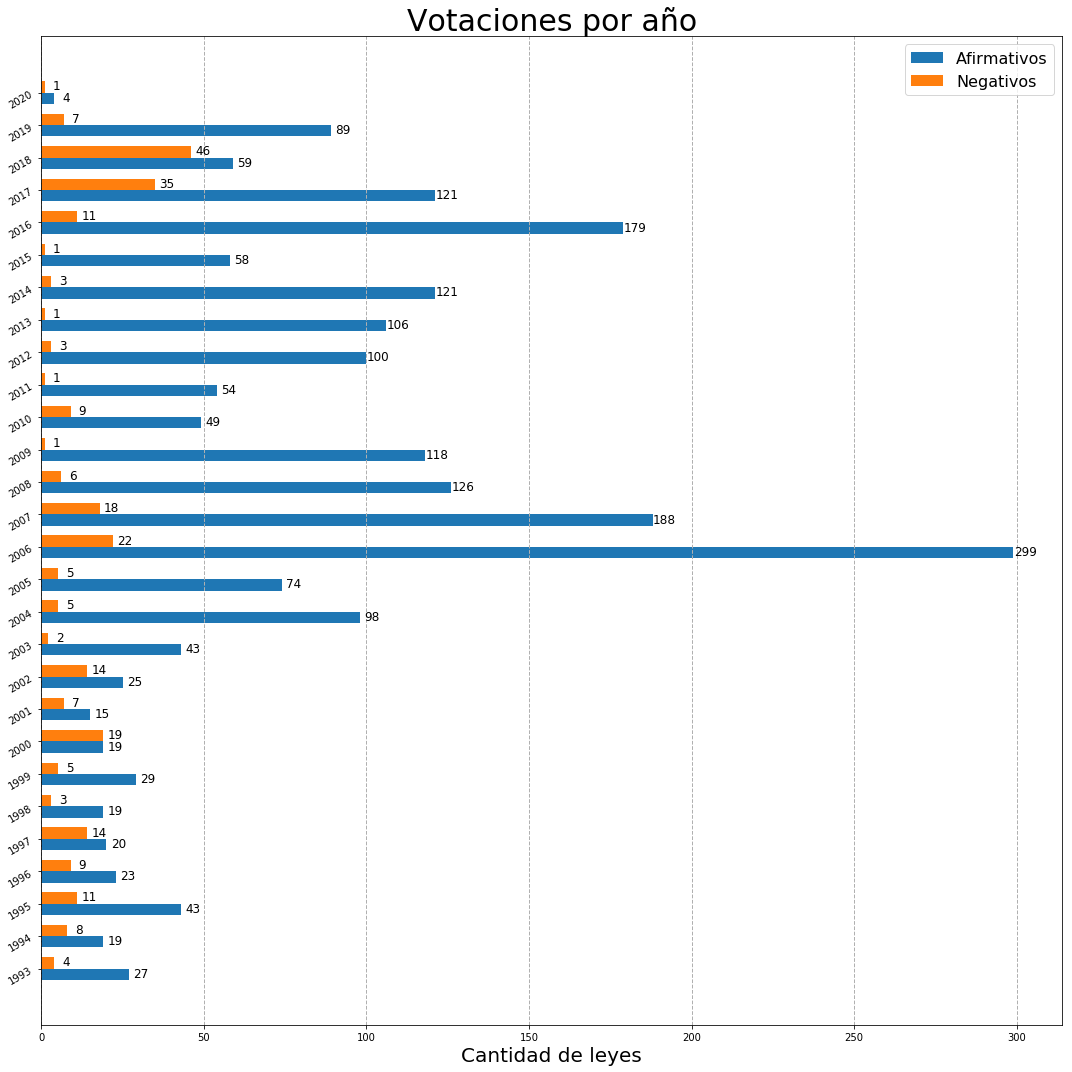

In [14]:
labels = set([key for key in afirmativas])
afirma = list(afirmativas.values())
nega = list(negativas.values())

x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots(figsize = (15,15))
rects1 = ax.barh(x - width/2, afirma, width, label='Afirmativos')
rects2 = ax.barh(x + width/2, nega, width, label='Negativos')
ax.set_xlabel('Cantidad de leyes', fontsize = 20)
ax.set_title('Votaciones por año', fontsize = 30)
ax.set_yticks(x)
ax.set_yticklabels(labels)
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
ax.grid(axis = 'x', linestyle='--', linewidth= 1)
ax.legend(fontsize = 16)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(12, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('../figs/leyesPorAno.png')
plt.show()

In [63]:
for vote in congress.years[2000]:
    if vote.result == "NEGATIVO":
        print(f'{vote.vote_title}')
        print(f'Tipo de mayoria: {vote.voting_type}')
        print(f'Afirmativos: {len(vote.votos["AFIRMATIVO"])}')
        print(f' Negativos: {len(vote.votos["NEGATIVO"])}  \n')

Moción del Diputado López Arias, solicitando el tratamiento sobre tabla del Exp 2010-D-00, de Resolución Pedido de Informe verbal del Ministro del Interior sobre actos de represión policia
Tipo de mayoria: Dos tercios
Afirmativos: 89
 Negativos: 95  

Moción del Diputado Das Neves solicitando el tratamiento sobre tablas del Exp 0008-S-2000, en revisión por el que se suspenden las ejecuciones por Créditos hipotecarios otorgados por el Banco Hipotecario S.A
Tipo de mayoria: Dos tercios
Afirmativos: 81
 Negativos: 107  

Moción de Orden del Diputado Urtubey, solicitando el apartamento del reglamento para tratar sobre tablas el Proyecto de Ley en revisión - Exp. 0017-S-00, referido a la ampliación de los Créditos destinados a la creación de puestos de trabajos temporarios	
Tipo de mayoria: Tres cuartos
Afirmativos: 82
 Negativos: 113  

Moción de Orden del Diputado Ayala solicitando el apartamento del Reglamento, para requerir el tratamiento sobre tablas del Exp. 0007-S-00, situación de em